In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [92]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
data = pd.read_csv('train.csv')
data.drop('Loan_ID', axis=1, inplace=True)

In [94]:
# just drop all NA
data_NA = data.dropna()

In [95]:
data_NA.Dependents = data_NA.Dependents.astype('string')
data_NA.Dependents = data_NA.Dependents.apply(lambda x: x.replace('3+','3'))
data_NA.Dependents = data_NA.Dependents.astype('int64')

In [96]:
data_NA_num = data_NA.select_dtypes(include=['float64', 'int64'])
data_NA_cat = data_NA.select_dtypes(include='object')

In [97]:
data_NA_cat_dum = pd.get_dummies(data_NA_cat, columns=['Gender', 'Married', 'Education', 'Self_Employed',
                                                              'Property_Area'])

In [98]:
new_data_NA = pd.concat([data_NA_num, data_NA_cat_dum], axis=1)

In [99]:
X = new_data_NA.drop('Loan_Status', axis=1)
y = new_data_NA['Loan_Status'].map({'N':0, 'Y': 1})

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [101]:
# build simple rf model, call method 'feature_importances'

In [102]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)
print(classification_report(y_test, pred_rf, digits=5))

              precision    recall  f1-score   support

           0    0.65517   0.63333   0.64407        30
           1    0.83582   0.84848   0.84211        66

    accuracy                        0.78125        96
   macro avg    0.74550   0.74091   0.74309        96
weighted avg    0.77937   0.78125   0.78022        96



**We can see that there is 6 strong features, let's remove the rest and build a model on best 6.**

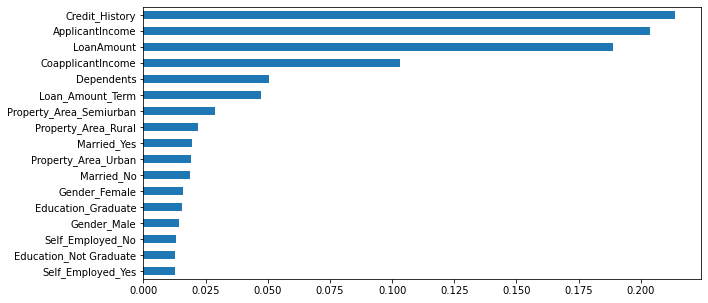

In [103]:
pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh', figsize=(10,5));

In [104]:
X_selected = X[['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Dependents', 'Loan_Amount_Term']]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42, stratify=y)

In [106]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)
print(classification_report(y_test, pred_rf, digits=5))

              precision    recall  f1-score   support

           0    0.71875   0.76667   0.74194        30
           1    0.89062   0.86364   0.87692        66

    accuracy                        0.83333        96
   macro avg    0.80469   0.81515   0.80943        96
weighted avg    0.83691   0.83333   0.83474        96



In [107]:
log_clf = LogisticRegression(random_state=42,max_iter=1000)
log_clf.fit(X_train, y_train)

pred_log = log_clf.predict(X_test)
print(classification_report(y_test, pred_log, digits=5))

              precision    recall  f1-score   support

           0    0.85000   0.56667   0.68000        30
           1    0.82895   0.95455   0.88732        66

    accuracy                        0.83333        96
   macro avg    0.83947   0.76061   0.78366        96
weighted avg    0.83553   0.83333   0.82254        96



**We can see that our metrics have improved after removing unnecessary features.**